In [1]:
import sklearn
import numpy as np
import pandas as pd

housing = pd.read_csv("./data/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


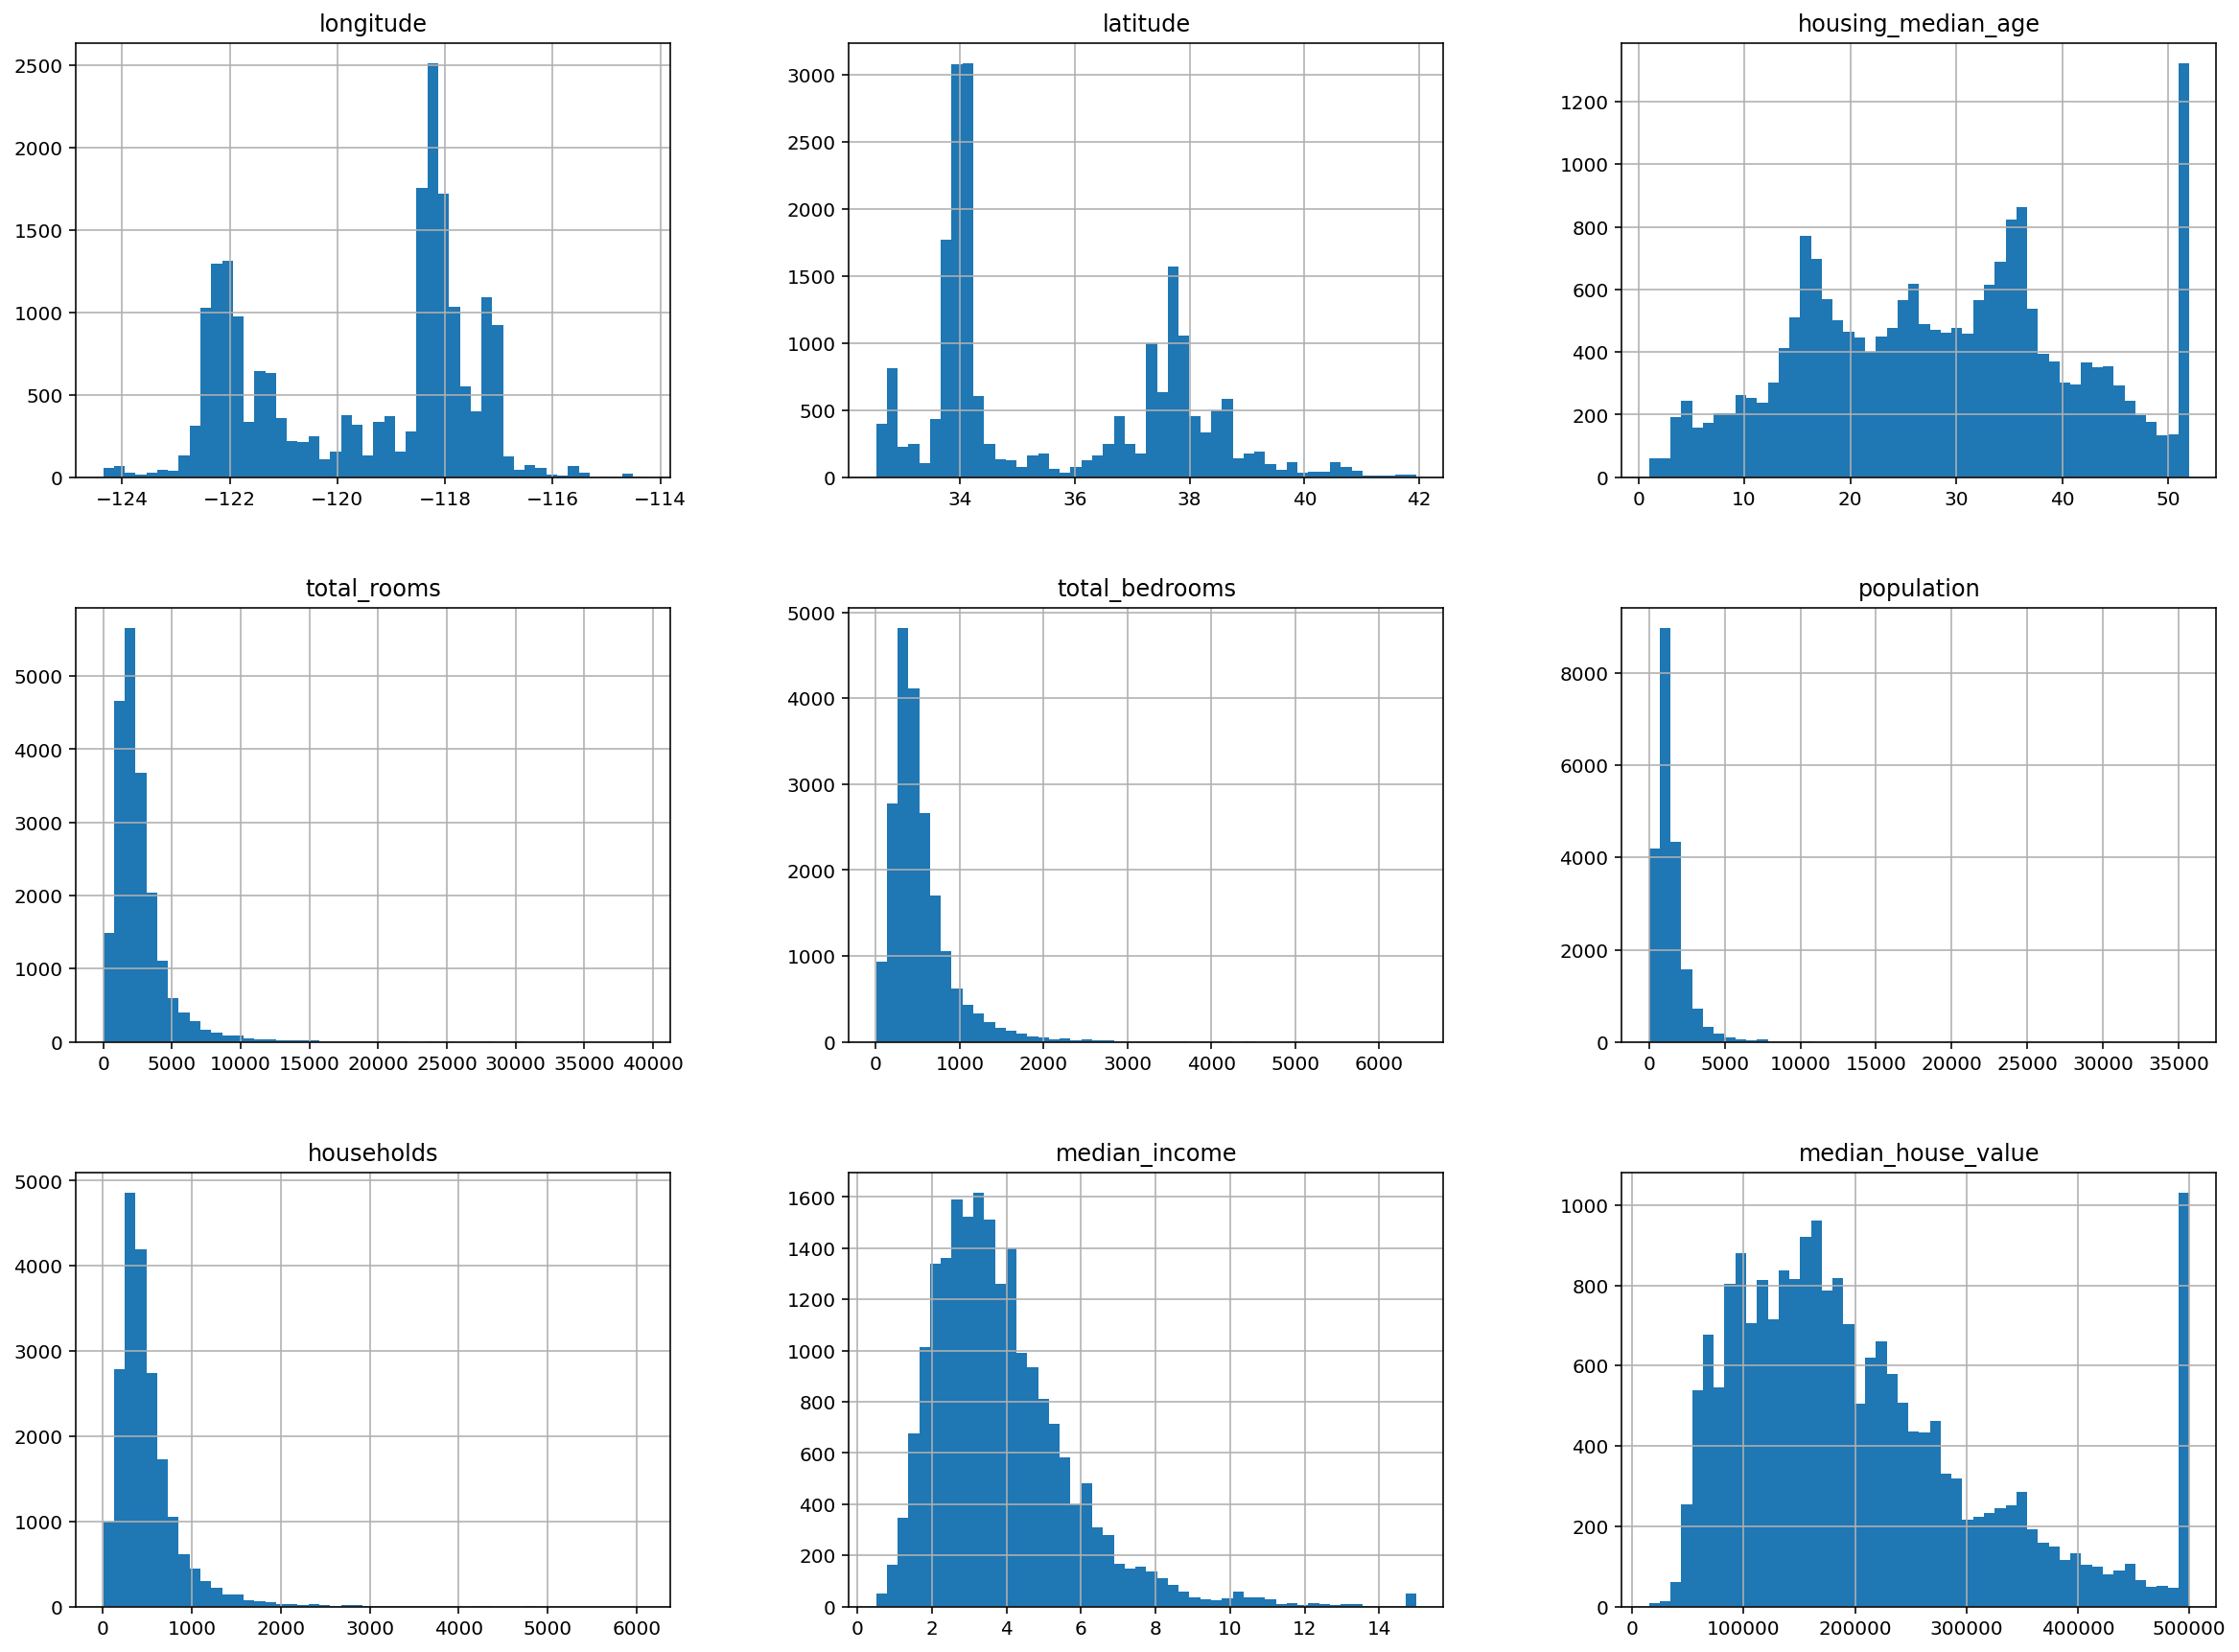

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=13)

In [7]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2973,-119.08,35.34,15.0,1474.0,235.0,768.0,238.0,4.1528,130100.0,INLAND
14432,-117.23,32.80,21.0,2429.0,579.0,1011.0,538.0,3.2250,229400.0,NEAR OCEAN
13916,-116.15,34.14,18.0,3312.0,705.0,1251.0,512.0,3.0139,82600.0,INLAND
18848,-122.37,41.41,28.0,1729.0,419.0,929.0,370.0,1.2700,53100.0,INLAND
2208,-119.87,36.81,6.0,1891.0,341.0,969.0,330.0,4.6726,107800.0,INLAND


<AxesSubplot:>

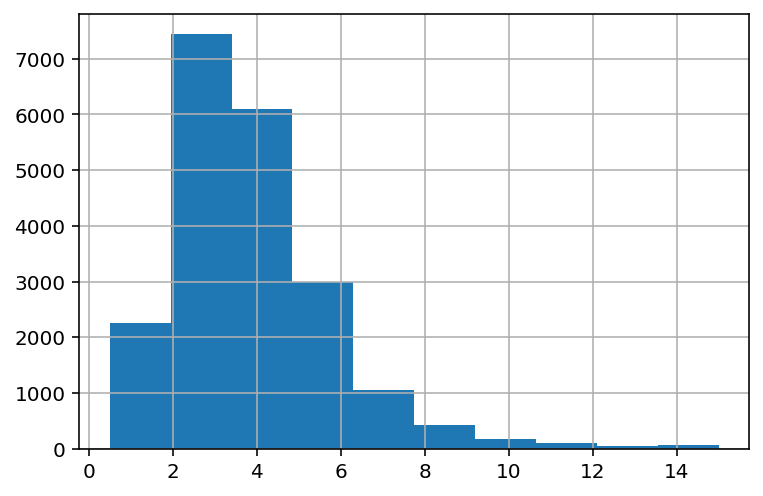

In [8]:
housing["median_income"].hist()

In [9]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])

In [10]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

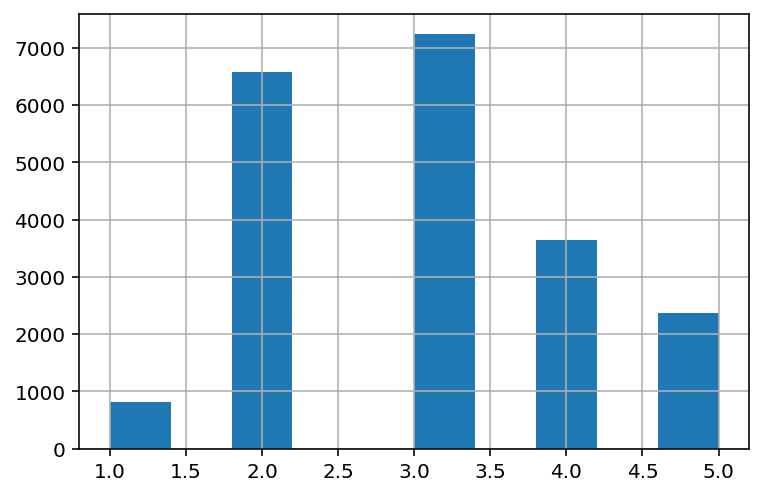

In [11]:
housing["income_cat"].hist()

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=13)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index] 

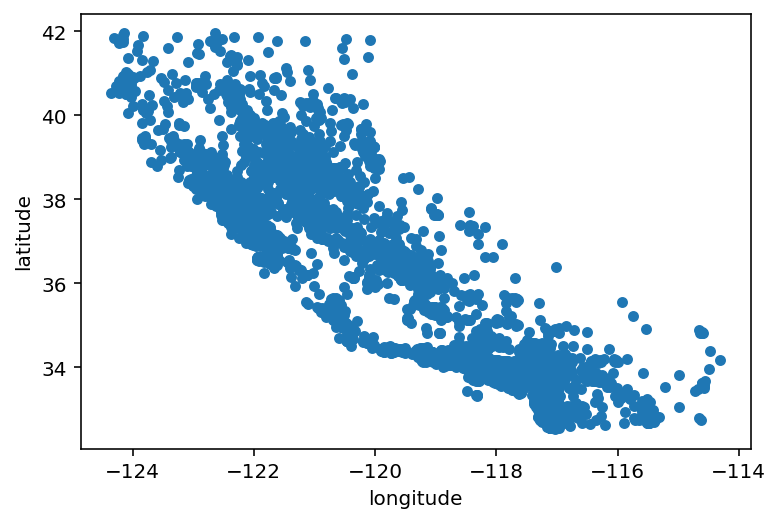

In [13]:
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude");

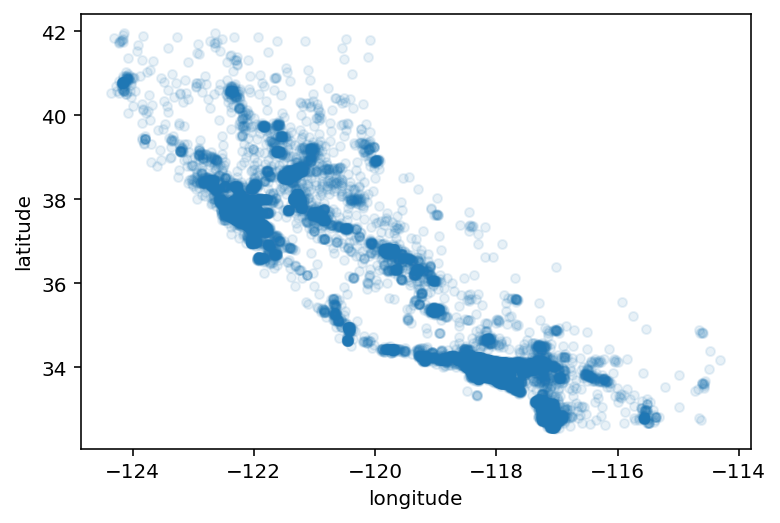

In [14]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1);

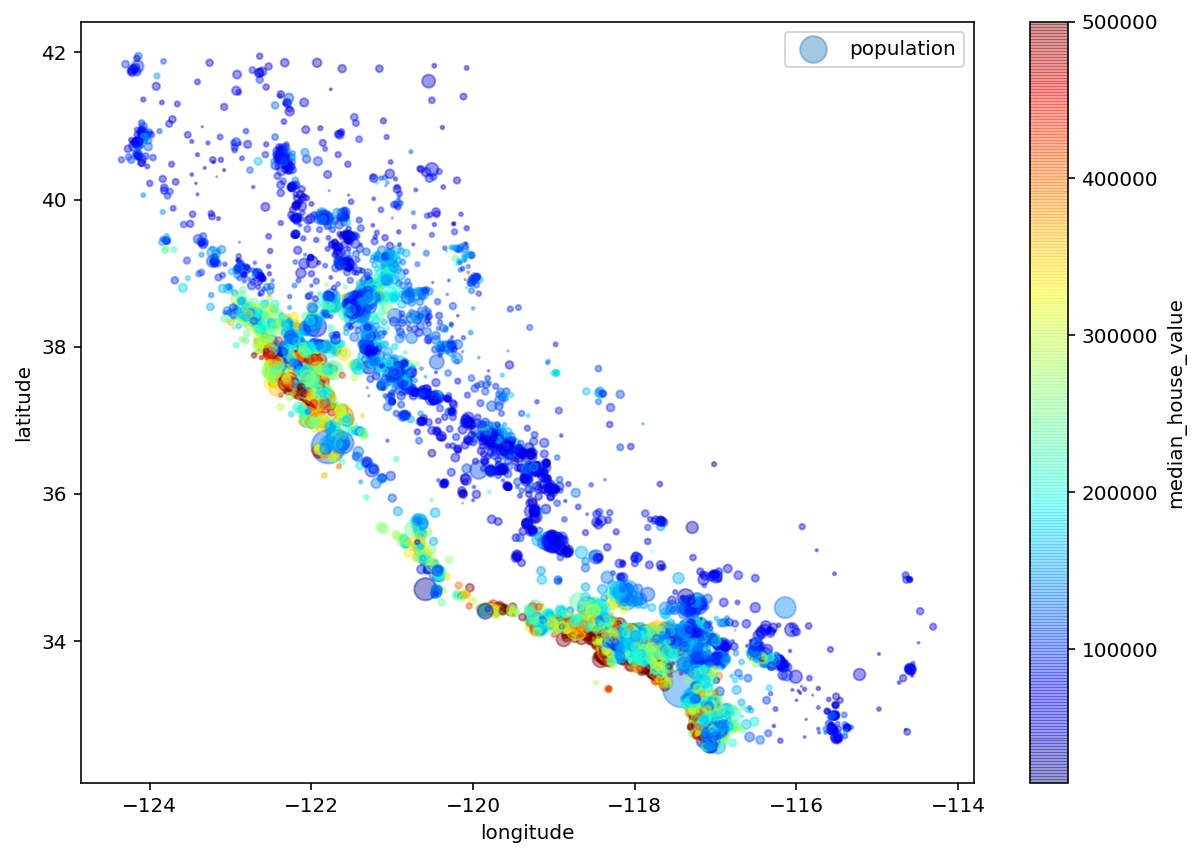

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            sharex=False)
plt.legend();

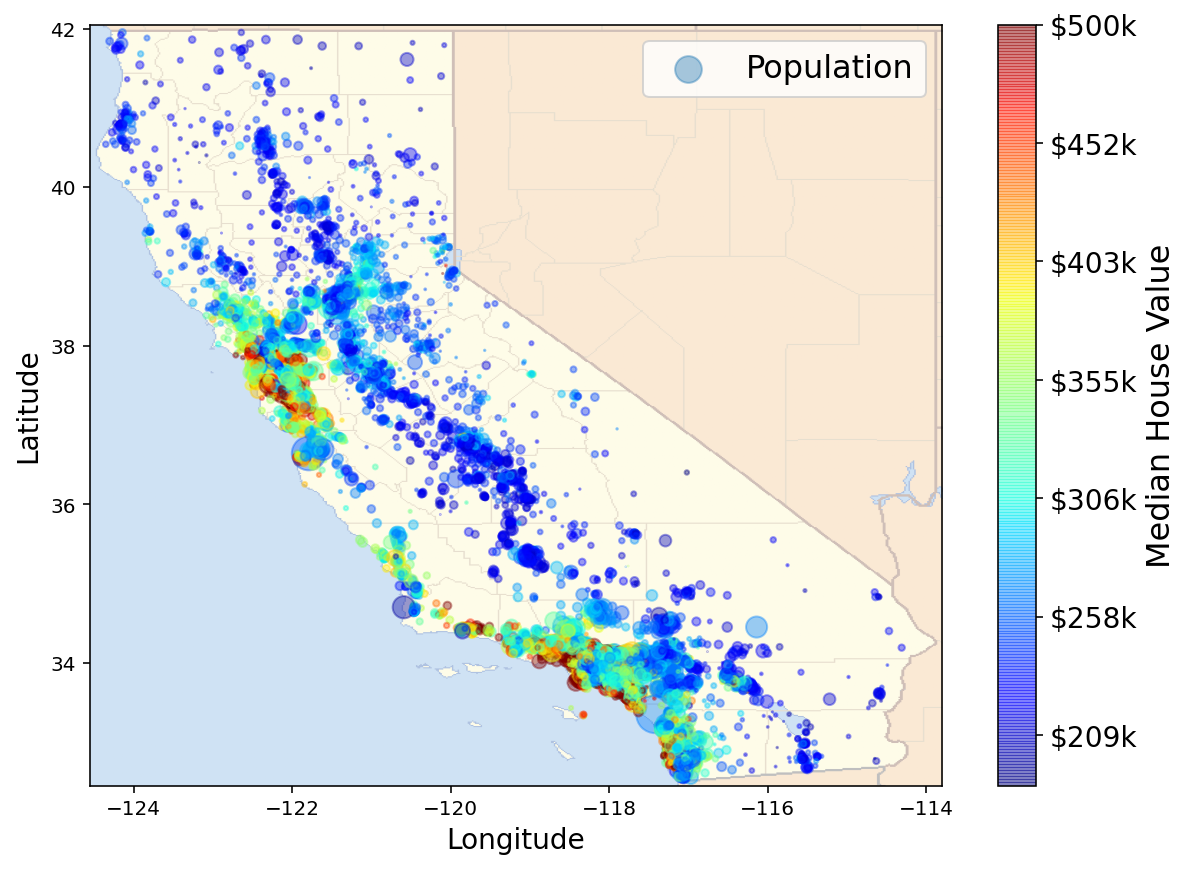

In [16]:
import matplotlib.image as mping
california_img=mping.imread("./data/california.png")
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                 s=housing['population']/100, label="Population",
                 c="median_house_value", cmap=plt.get_cmap("jet"),
                 colorbar=False, alpha=0.4,
                 )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
          cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16); plt.show()

In [17]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.689000
total_rooms           0.137326
housing_median_age    0.100730
households            0.069638
total_bedrooms        0.054213
population           -0.022837
longitude            -0.041520
latitude             -0.147386
Name: median_house_value, dtype: float64

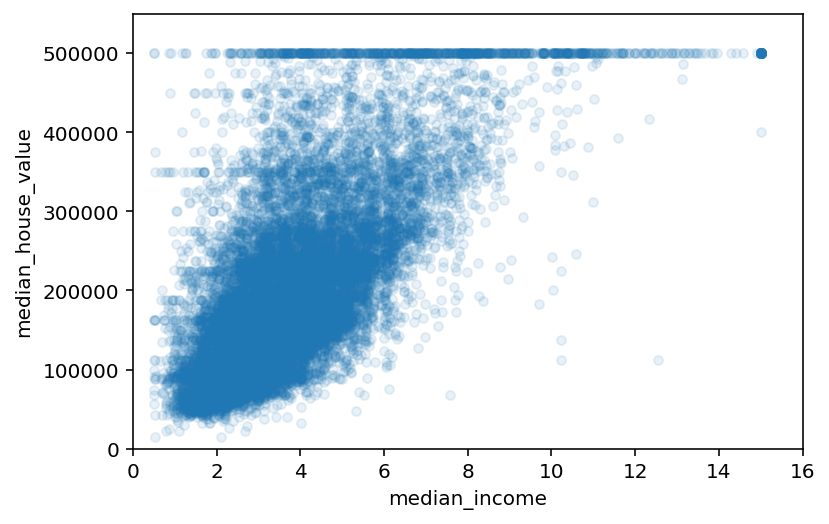

In [18]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
            alpha=0.1)
plt.axis([0, 16, 0, 550000]);

In [19]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [20]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.689000
rooms_per_household         0.153984
total_rooms                 0.137326
housing_median_age          0.100730
households                  0.069638
total_bedrooms              0.054213
population_per_household   -0.022265
population                 -0.022837
longitude                  -0.041520
latitude                   -0.147386
bedrooms_per_room          -0.255736
Name: median_house_value, dtype: float64

In [21]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [22]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
3328,-122.72,38.88,29.0,2781.0,NaN,890.0,310.0,1.9906,INLAND,2
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,NEAR OCEAN,3
10389,-117.66,33.58,6.0,4186.0,NaN,1794.0,541.0,9.6986,<1H OCEAN,5
7668,-118.08,33.92,38.0,1335.0,NaN,1011.0,269.0,3.6908,<1H OCEAN,3
11512,-118.10,33.74,32.0,2035.0,NaN,934.0,512.0,4.2287,NEAR OCEAN,3


In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [24]:
X = imputer.transform(housing_num)

In [25]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                         index=housing_num.index)

In [26]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
3328,-122.72,38.88,29.0,2781.0,433.0,890.0,310.0,1.9906,2.0
20267,-119.19,34.20,18.0,3620.0,433.0,3171.0,779.0,3.3409,3.0
10389,-117.66,33.58,6.0,4186.0,433.0,1794.0,541.0,9.6986,5.0
7668,-118.08,33.92,38.0,1335.0,433.0,1011.0,269.0,3.6908,3.0
11512,-118.10,33.74,32.0,2035.0,433.0,934.0,512.0,4.2287,3.0


In [27]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
20224,NEAR OCEAN
13718,INLAND
8156,<1H OCEAN
17282,NEAR OCEAN
523,NEAR BAY
667,NEAR BAY
13911,INLAND
18996,INLAND
13126,INLAND
13394,INLAND


In [28]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[4.],
       [1.],
       [0.],
       [4.],
       [3.],
       [3.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [29]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [30]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [31]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [32]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [33]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [34]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.to_numpy())

In [35]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household",
                                  "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,population_per_household
20224,-119.3,34.29,41,1445,410,1052,388,2.6333,NEAR OCEAN,2,3.72423,2.71134
13718,-117.19,34.08,5,4458,751,2392,773,4.5938,INLAND,4,5.76714,3.09444
8156,-118.11,33.82,37,1756,345,836,335,4.375,<1H OCEAN,3,5.24179,2.49552
17282,-119.73,34.42,25,2024,312,907,335,5.4127,NEAR OCEAN,4,6.04179,2.70746
523,-122.24,37.77,52,1153,235,481,223,2.6411,NEAR BAY,2,5.1704,2.15695


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [37]:
housing_num_tr

array([[ 1.34008239e-01, -6.27712573e-01,  9.75618879e-01, ...,
        -6.83359381e-01, -3.43355480e-02,  1.08596954e+00],
       [ 1.18829310e+00, -7.26014798e-01, -1.88724577e+00, ...,
         1.35808065e-01, -1.32161368e-03, -6.92619100e-01],
       [ 7.28604912e-01, -8.47722315e-01,  6.57522806e-01, ...,
        -7.48466882e-02, -5.29339560e-02, -2.60483344e-01],
       ...,
       [ 7.53587965e-01, -7.77506440e-01,  8.16570843e-01, ...,
        -4.98190994e-02,  7.55229561e-03, -4.67707064e-01],
       [-1.20008682e+00,  7.48518578e-01, -5.35337466e-01, ...,
        -1.56043848e-02, -5.23810829e-02, -3.90200962e-01],
       [ 6.63648973e-01, -7.72825381e-01,  1.00854679e-01, ...,
        -6.82138027e-01,  1.28198566e-01,  1.18815603e+00]])

In [38]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [39]:
housing_prepared

array([[ 0.13400824, -0.62771257,  0.97561888, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.1882931 , -0.7260148 , -1.88724577, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.72860491, -0.84772231,  0.65752281, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.75358797, -0.77750644,  0.81657084, ...,  0.        ,
         0.        ,  0.        ],
       [-1.20008682,  0.74851858, -0.53533747, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.66364897, -0.77282538,  0.10085468, ...,  0.        ,
         0.        ,  0.        ]])

In [40]:
housing_prepared[0]

array([ 0.13400824, -0.62771257,  0.97561888, -0.54120955, -0.29578534,
       -0.32479609, -0.28615036, -0.65109153, -0.95445595, -0.68335938,
       -0.03433555,  1.08596954,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ])

In [41]:
housing_prepared.shape

(16512, 17)

In [42]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [43]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("예측:", lin_reg.predict(some_data_prepared))

예측: [217050.43819492 156138.72151407 248823.78625501 307652.71455545
 201291.40767965]


In [44]:
print("예측:", lin_reg.predict(some_data_prepared))

예측: [217050.43819492 156138.72151407 248823.78625501 307652.71455545
 201291.40767965]


In [45]:
print("레이블:", list(some_labels))

레이블: [170800.0, 126500.0, 218200.0, 392800.0, 241000.0]


In [46]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67699.93700475428

In [47]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49192.69120902814

In [48]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=13)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=13)

In [49]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [50]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [51]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준 편차:", scores.std())
    
display_scores(tree_rmse_scores)

점수: [67067.56553301 68986.05976081 67561.56972433 72931.44402689
 70276.63992826 67072.08634085 72140.89118714 71032.22000211
 66894.7737603  70096.43293717]
평균: 69405.96832008568
표준 편차: 2111.578726943311


In [52]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수: [65797.17623298 70367.93439608 64752.66210951 71132.05123556
 66423.69407219 63798.85512905 68483.34130029 71379.39694587
 66800.888439   71088.95398501]
평균: 68002.49538455383
표준 편차: 2712.6046208897706


In [53]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=13)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=13)

In [54]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18440.92744222411

In [56]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수: [48868.82255803 51995.8192604  47911.05164527 49658.58606634
 47708.80863531 47301.84788588 49555.14693135 50834.61160289
 49512.97885818 53282.99219828]
평균: 49663.06656419298
표준 편차: 1817.8879248748424


In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor(random_state=13)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=13),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [58]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [59]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=13)

In [60]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63924.00123299211 {'max_features': 2, 'n_estimators': 3}
55836.15686130711 {'max_features': 2, 'n_estimators': 10}
53276.207703556385 {'max_features': 2, 'n_estimators': 30}
60392.65450789482 {'max_features': 4, 'n_estimators': 3}
53246.9413928351 {'max_features': 4, 'n_estimators': 10}
50978.463634691296 {'max_features': 4, 'n_estimators': 30}
58768.7137127905 {'max_features': 6, 'n_estimators': 3}
52234.92199836075 {'max_features': 6, 'n_estimators': 10}
50368.38878721694 {'max_features': 6, 'n_estimators': 30}
59108.14942076083 {'max_features': 8, 'n_estimators': 3}
52580.49224095119 {'max_features': 8, 'n_estimators': 10}
50389.669206285515 {'max_features': 8, 'n_estimators': 30}
62907.6804630598 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54300.25010453904 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59807.559744919716 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53336.28210888801 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [61]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.98950879e-02, 6.61251236e-02, 4.14532900e-02, 1.72816420e-02,
       1.73958033e-02, 1.77626692e-02, 1.68967808e-02, 2.63982189e-01,
       1.55959793e-01, 3.82597586e-02, 1.05136514e-01, 5.42529215e-02,
       9.70363122e-03, 1.17044811e-01, 2.41776181e-04, 3.12245659e-03,
       5.48575205e-03])

In [62]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.26398218905722326, 'median_income'),
 (0.15595979307095012, 'income_cat'),
 (0.11704481119358394, 'INLAND'),
 (0.10513651366672332, 'pop_per_hhold'),
 (0.06989508791855328, 'longitude'),
 (0.06612512363539866, 'latitude'),
 (0.05425292150325512, 'bedrooms_per_room'),
 (0.041453289986182695, 'housing_median_age'),
 (0.03825975856406827, 'rooms_per_hhold'),
 (0.017762669230104392, 'population'),
 (0.01739580326527105, 'total_bedrooms'),
 (0.017281642034906747, 'total_rooms'),
 (0.016896780836301032, 'households'),
 (0.009703631216312982, '<1H OCEAN'),
 (0.00548575204562063, 'NEAR OCEAN'),
 (0.003122456594519137, 'NEAR BAY'),
 (0.000241776181025349, 'ISLAND')]

In [63]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [64]:
final_rmse

50703.21019939267

In [66]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([48437.10343464, 52872.28063844])